# Clustering Evaluation 
<br>
앞서 붓꽃 데이터 세트의 경우 기존에 이미 Label 이 있었고, 군집화 결과를 이 label 과 비교해 군집화가 얼마나 효율적으로 됐는지 대충 파악 할 수 있었다. <br>하지만 대부분의 군집화 dataset 는 이렇게 비교할 만한 레이블을 가지고 있지 않기 때문에 군집화가 효율적으로 잘 됐는지 평가 할 수 있는 방안이 애매하다. <br>

이 때, 사용하는 것이 __실루엣 분석 ( silhouette analysis )__ 이다. <br><br>

__< What is Silhouette analysis >__<br><br>
각 군집 간의 거리가 얼마나 효율적으로 분리 되어 있는지를 나타내는 평가 방법.<br><br>

__< What is Sillhouette coefficient >__<br><br>
앞서 말한 효율적 분리는, 동일 군집끼리의 데이터는 서로 가깝게 뭉치고 다른 군집끼리의 데이터는 멀리 떨어져 있는 상태를 의미하며<br>
얼마나 가깝고 멀리 있는가를 나타내는 지표가 '<u>실루엣 계수</u>' 이다.<br>
즉, 실루엣 분석은 '실루엣 계수' 를 기반으로 한다.<br><br>
자, 그러면 이 실루엣 계수는 어떻게 계산 될까? [그림](https://blog.kakaocdn.net/dn/zSiVB/btqxQpIo8Ov/vyDaAmHJMtJRBlZg3DZ041/img.png)과 함께 아래 설명을 읽어보자. ( p.420 참고 )<br><br>
일단, cluster a 내에 있는 특정 데이터 포인트 X 와 <span style="color:red">동일 cluster 내부의 다른 모든 데이터 포인트와의 거리의 평균을 a(i) </span>라 하고,<br><span style="color:blue">각 각의 다른 cluster 에 있는 모든 데이터 포인트와의 거리의 평균 중 최솟값을 b(i)</span>
 라 한다. <br><br>
 이 때,<br>
 > b(i) - a(i) = 두 군집 간의 거리가 얼마나 떨어져 있는가 이고,<br>
 위 값을 정규화 하기 위해서는 MAX( a(i) , b(i) ) 로 나누어 주어야 한다.<br><br>
 즉, [ 실루엣 계수 s (i) ](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwRtBtDLPSHxyJq0sUT8WYeDHOs6Dt-SDaAA&usqp=CAU) 

 추가로,  -1 < s(i) < 1 를 만족해야 하며 <br>
 * 1 에 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것
 * 0 에 가까워질수록 근처의 군집과 가까워진다는 것
 * (-) 값은 아예 다른 군집에 데이터 포인트가 할당됐다는 것 
 
__< How to use Silhouette analysis in Scikit-learn >__<br><br>
[silhouette_samples 공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples) 와 [silhouette_score 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) 를 통해 이해하자. <br><br>
참고로, silhouette_score 함수의 반환값은 np.mean(silhouette_samples()) 와 동일하다.<br><br>

__< Conditions for better clustering >__<br><br>

1. 전체 실루엣 계수의 평균값이 1에 가까울수록<br><br>
2. 전체 실루엣 계수의 평균값과 개별 군집의 평균값의 편차가 크지 않아야 한다. <br><br>
쉽게 말해, 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면<br>
좋은 군집화라 평가 되지 못한다. 

<br><br>
이제 붓꽃 데이터 세트를 가져와서 군집 평가를 진행 해보자.

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score 
import numpy as np
import pandas as pd 
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()

feature_names =['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data,columns=feature_names)
kmeans = KMeans(n_clusters=3,max_iter=300,random_state=232).fit(iris_df)

# kmeans 를 통해 구한 군집들 = 레이블 
iris_df['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수 값 구하기 
score_samples = silhouette_samples(iris.data,iris_df['cluster'])

# iris_df 에 실루엣 계수 컬럼 추가 
iris_df['silhouette_coefficient'] = score_samples

# 모든 데이터의 평균 실루엣 계수 구하기 
average_score = silhouette_score(iris.data,iris_df['cluster'])

print('붓꽃 dataset 평균 실루엣 분석 score: ',np.round(average_score,3))

iris_df

붓꽃 dataset 평균 실루엣 분석 score:  0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coefficient
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454


In [12]:
iris_df.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,silhouette_coefficient
cluster,,,,,
0,5.901613,2.748387,4.393548,1.433871,0.417320
1,5.006000,3.428000,1.462000,0.246000,0.798140
2,6.850000,3.073684,5.742105,2.071053,0.451105


평균 실루엣 계수 값은 약 0.553 이다.<br>
그리고 각 군집으로 groupby 를 해보면 1번 군집의 실루엣 계수가 평균적으로 가장 높은 것을 확인 할 수 있다.<br><br>
즉, 실루엣 계수는 다른 군집과의 거리를 나타내므로 1번 군집이 2,3번 군집보다 잘 분리 되어 있다 해석 할 수 있다.

## 군집별 평균 실루엣 계수의 시각화를 통한 군집 갯수 최적화 방법

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 되었다고 할 수는 없다.<br>
특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로는<br>
높을 수 있다.<br><br>
즉, 개별 군집별로 적당히 분리된 거리를 유지하며, 군집 내의 데이터가 서로 뭉쳐 있는 경우에 군집 개수가 적절하게 설정되었다 판단 할 수 있다.
<br><br> 
[plotly 공식 문서](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) <span style="color:red">에 군집 갯수를 바꿔가며 실루엣 계수를 군집 별로 비교해둔 자료를 분석하여, 왜 평균 실루엣 계수가 높기만 한게 최적화 방법이 아니며, 군집화를 최적화 하기 위해 몇 개의 군집 갯수를 사용해야 하는가에 대해 알아보자. </span><br><br>
먼저, 해당 공식 문서 코드를 가져와서 군집 갯수 별로 결과를 확인하고 코멘트를 남기기 위해 함수화 시켰다.

In [20]:
def optimize_clusters_num(n_clusters):
    
    print(__doc__)
    
    # 서브 플롯 생성 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 첫 번째 서브플롯은 각 cluster 별 실루엣 계수 그래프  
    # 실루엣 계수 범위는 -0.1 ~ 1 로 설정 
    ax1.set_xlim([-0.1, 1])
    
    # 개별 cluster 의 실루엣 플롯 사이에 빈 공간을 삽입하여 명확하게 구분하기 위한 설정 
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 임의로 설정한 데이터 세트를 KMeans 로 군집화 시키고, 
    # fit_predict() 를 통해, 각 데이터들이 속할 군집 인덱스를 예측한 값을 label 로 설정 
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # 모든 데이터에 대한 실루엣 계수의 평균을 silhouette_score() 를 통해 구하기 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # silhouette_samples() 를 이용해서 각 데이터 별 실루엣 계수 구하기 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        # 특정 cluster 에 속하는 각 데이터의 실루엣 계수를 가져와서 정렬 
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # fill_betweenx 를 이용하여 첫 번째 서브플롯 그래프 그리기 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 각 cluster 별로 평균 실루엣 계수를 수직 빨간 점선으로 표시
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # scatter 를 이용하여 두 번째 서브플롯 그래프 그리기 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # cluster_centers_ 로 개별 cluster 의 중심 위치 좌표 추출 
    centers = clusterer.cluster_centers_
    
    # 각 cluster 중간 위치에 숫자 표기 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    # 나머지 cluster 중간 번호 매기기 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

이제 함수를 실행하기 위해 import 시킬 꺼 해주고, 임의의 군집용 데이터 세트를 만들어 두자. main() 문 

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# make_blobs() 을 이용해서 임의의 군집화용 데이터 세트를 생성 
# 샘플 데이터 500개, 2차원 평면에 표현하기 위한 피처 2개, 군집은 4개 를 기본으로 설정 (어쩌피 KMeans 에서 갯수 바꾸면서 재 군집화 할 것임)
# 군집 4개 중 1개만 확실히 분리 되고 나머지 3개 군집은 서로 가깝게 배치 된 형태  
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  

이제 군집 갯수를 지정해서 함수를 호출한 뒤 그래프 결과를 확인, 분석 단계를 거쳐보자.

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


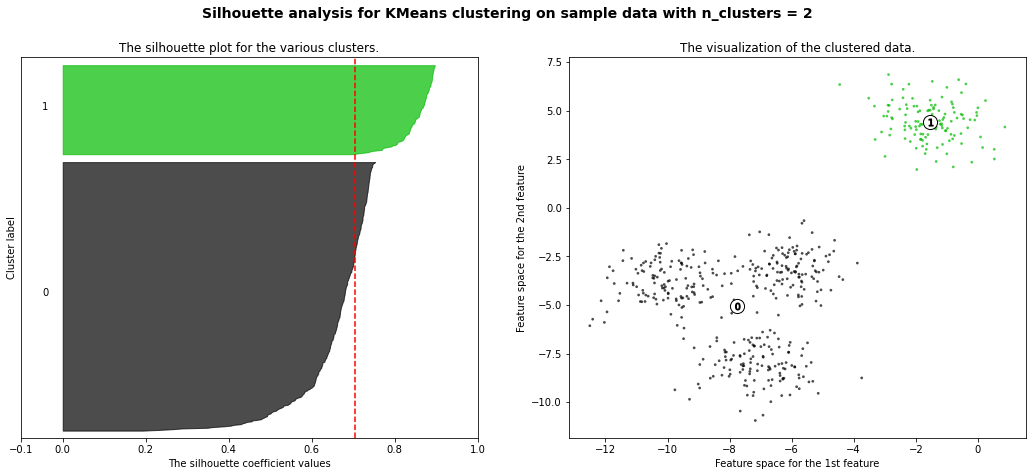

In [23]:
# 군집 갯수 2개 일 때, 그래프 시각화 
optimize_clusters_num(2)

일단, 군집이 2개일 경우이다. 평균 실루엣 계수가 0.704 로 상당히 높게 나타난 것을 볼 수 있다. 그러면 군집을 2개로 분리한게 최적의 방법일까? <br>
군집 데이터들에 따른 평균 실루엣 계수를 각 각 살펴보자. 1번 군집의 경우 모든 데이터의 실루엣 계수 가 평균 실루엣 계수 보다 높지만,<br>0번 군집의 경우 절반 이상의 데이터가 평균 실루엣 계수보다 낮은 걸 확인 할 수 있다.<br><br>
오른쪽 그래프를 보자. 평균 실루엣 계수보다 전부 높은 1번 군집은 0번 군집과 멀리 떨어져 있으면서도 내부적으로 잘 뭉쳐 있는 반면,<br>
0번 군집은 평균 실루엣 계수보다 낮은 데이터가 대부분이기 때문에 1번 군집과 먼 경우도 있고 내부 데이터끼리 많이 떨어져 있는 모습을 볼 수 있다.

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


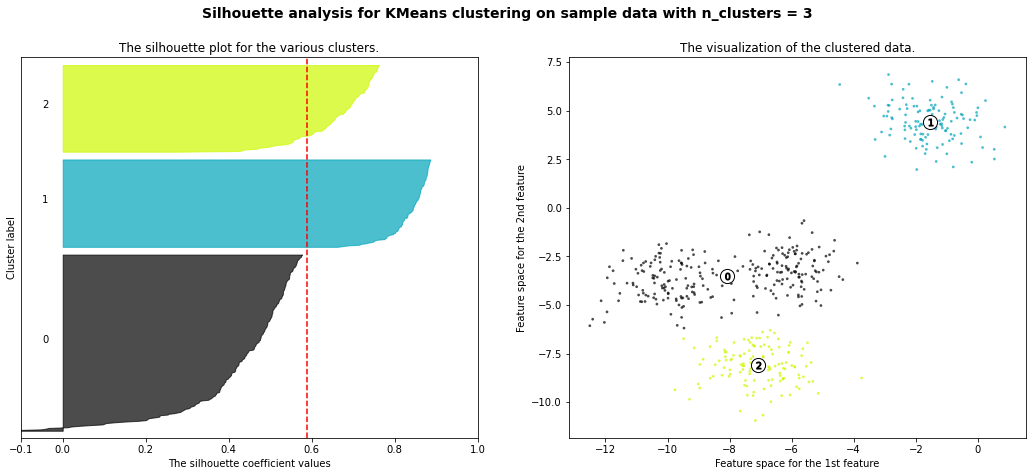

In [24]:
# 군집 갯수 3개 일 때, 그래프 시각화 
optimize_clusters_num(3)

이번에는 군집이 3개일 경우이다. 전체 데이터의 평균 실루엣 계수는 0.588 로 높은 수준은 아니다. <br>
또한 1번 군집 모든 데이터는 평균 실루엣 계수 이상인 반면, 0번 군집은 모두 평균이하이고, 2번 군집은 일부만 평균 이하인 상태를 보인다. <br><br>
군집이 2개일 때와 차이를 보자면, 0번 군집은 내부적으로 멀리 떨어져 있어 기존에 이미 실루엣 계수 값들이 대부분 평균 실루엣 계수보다 낮았었는데 2번 군집이 추가되면서, 2번 군집과의 거리가 가깝게 위치되어 결국 0번 군집의 모든 데이터가 평균 실루엣 계수 이하의 값을 가지게 되었다.  

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


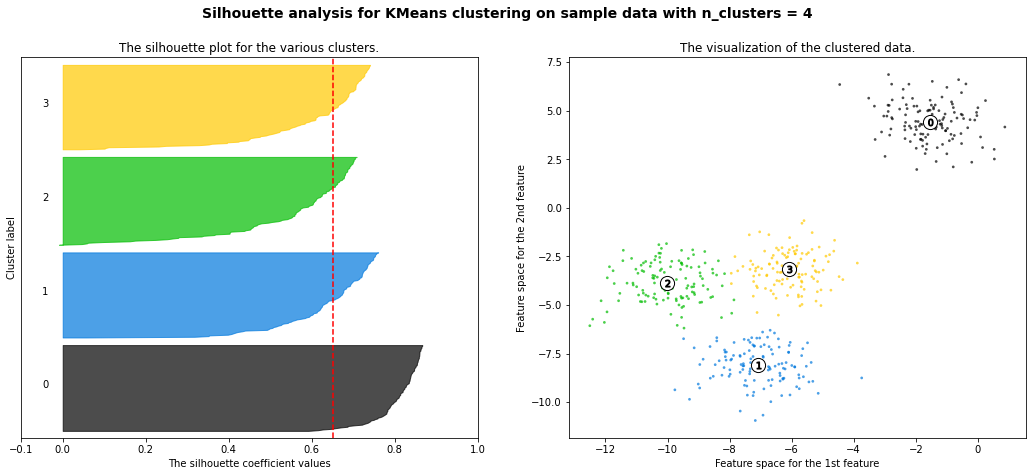

In [25]:
# 군집 갯수 4개 일 때, 그래프 시각화 
optimize_clusters_num(4)

해석하는 방법은 위와 동일하기 때문에 생략한다.<br><br>
간단하게 위 경우들과 비교하여 차이점만 살펴 보자. <br>
4개 군집으로 나뉘면서 문제가 있었던 0번 군집의 위치가 바꾸었다. 또한 나머지 3개의 군집 모두 절반 이상의 데이터들이 평균 실루엣 계수 이상의 값을 가지면서 오른쪽 그래프에 보이다시피, 어느정도 잘 분리가 된 상태임을 확인 할 수 있다.<br>
즉, 가장 이상적인 군집화 개수로 판단 할 수 있는 것이다. <br><br>
기존에 앞에서 언급했듯이, 평균 실루엣 계수가 높다고 무조건 최적화 된 방법이 아니라는 것을 증명했다. <br>
이제 더 많은 갯수의 군집 케이스도 보고 넘어가자. 

For n_clusters = 10 The average silhouette_score is : 0.3386172527066813


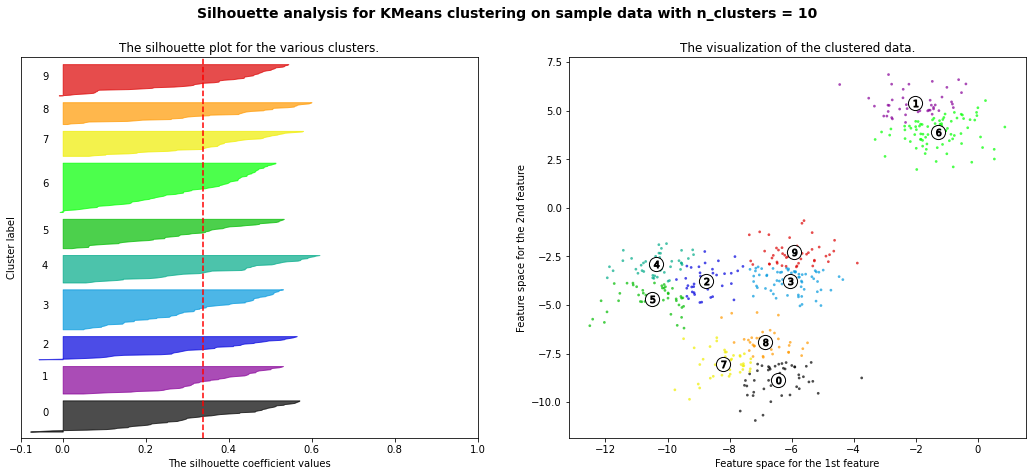

In [33]:
# 군집 갯수 5개 일 때, 그래프 시각화 
optimize_clusters_num(10)

For n_clusters = 30 The average silhouette_score is : 0.3387574932580337


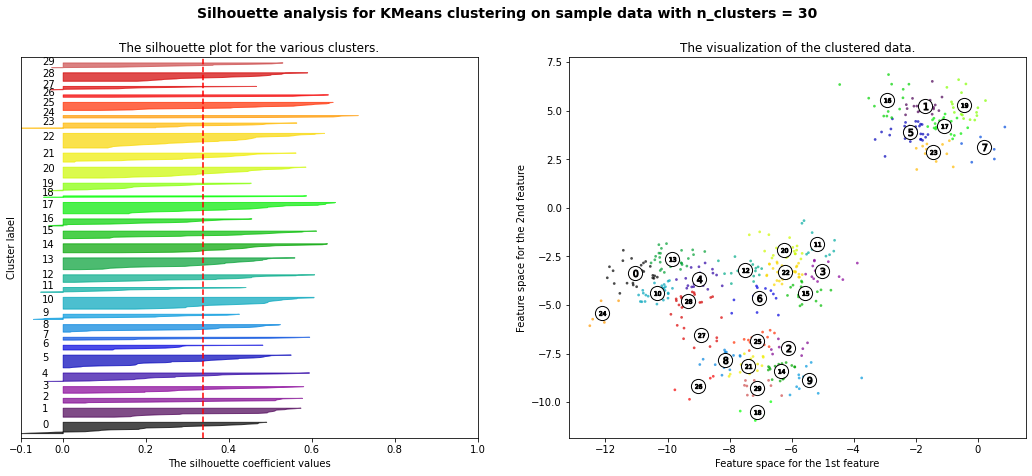

In [34]:
# 군집 갯수 6개 일 때, 그래프 시각화 
optimize_clusters_num(30)

10 개와 30 개의 군집으로 나누었을 때 결과물이다. <br>
왼쪽 그래프를 보면 각 군집의 절반 이상의 데이터들이 평균 실루엣 계수보다 높은 것을 볼 수 있다.<br> 
하지만 여기서 문제가 무엇일까?<br><br>
먼저, 평균 실루엣 계수 값이 최적화 방법으로 채택하기에는 터무니 없이 낮다. 왜 낮을까?<br>
왼쪽 그래프를 자세히 보면, 각 군집의 데이터들 중 실루엣 계수가 0 에 가까운 경우가 일부 있다. <br>
이것이 의미하는 것은 각 군집 별로, 다른 군집과 분포가 겹치는 소량의 데이터들이 존재한다는 뜻이고, 오른쪽 그래프를 보면 이해가 가능하다.<br><br>
이처럼 평균 실루엣 계수가 낮다면, 각 군집들이 완전히 분리된 상태가 아니라는 것을 알아두자.

## 평균 이동 ( Mean Shift ) 
<br>
( p. 427 ~ 참고 ) 

__< What is Mean Shift ? >__<br><br>
K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행하는 방법.<br><br>
단, K-평균은 centroid 가 본인 군집에 속하는 데이터들과의 평균 거리를 갖는 중심으로 이동하지만<br> 
Mean Shift 는 중심을 데이터가 모여 있는 <span style="color:red">밀도가 가장 높은 곳 </span>으로 이동시킨다. <br><br>

__< How it works ? >__<br><br>
Mean shift 는 <br>
* 특정 데이터를 반경 내의 데이터 중 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤, <br>그 반환 값으로 업데이트 하면서 이동하는 방식.<br><br> 

부가 설명<br>
* 군집 중심점은 가장 집중적으로 데이터가 모여 있는 확률 밀도 함수의 피크 점으로 선정 <br><br>
* 일반적으로 주어진 모델의 확률 밀도 함수 를 찾기 위해서 __KDE ( Kernel Density Estimation ) 을 이용__ <br><br>
* 즉, 임의의 포인트에서 시작해 위와 같은 피크 포인트를 찾을 때까지 KDE 를 반복적으로 적용하며 군집화를 수행 <br><br>

__< What is KDE ? >__ 
[다크 프로그래머 - KDE ](https://darkpgmr.tistory.com/147)<br><br>
KDE 는 커널 함수를 통해 어떤 변수의 [확률 밀도 함수](https://velog.io/@groovallstar/%ED%99%95%EB%A5%A0-%EB%B6%84%ED%8F%AC-%ED%95%A8%EC%88%98%EC%99%80-%ED%99%95%EB%A5%A0-%EB%B0%80%EB%8F%84-%ED%95%A8%EC%88%98%EC%9D%98-%EC%9D%98%EB%AF%B8) 를 추정하는 대표적인 방법.<br><br>
관측된 데이터 각 각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. <br>
* 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알 게 되므로, 이를 통해 해당 변수의 많은 요소를 알 수 있다. <br><br>

KDE 의 커널 함수로써 대표적으로 __가우시안 분포 함수__ 가 사용된다. ( 참고로 가우시안 분포 = 정규 분포라 생각하고 넘어가자 )<br><br>
### KDE 함수 식

[KDE](https://t1.daumcdn.net/cfile/tistory/261A943654F0325532) 해당 링크 확인
* K = 커널 함수 
* x = 확률 변수값 
* xi = 관측 값 
* h = 대역폭 bandwidth
    * 커널이 뽀족한 형태(h가 작은 값 = 과적합 하기 쉬움) 인지 완만한 형태(h가 큰 값 = 과소적합 하기 쉬움 )인지를 조절하는 파라미터
    * h 이 클수록 적은 수의 군집 중심점 , h 가 작을 수록 많은 수의 군집 중심점
    * 확률 밀도 추정 성능을 좌우하는 파라미터 
    * [h 변화에 따른 KDE 그림 자료](https://images.deepai.org/glossary-terms/401b98c8e4bd421db479a3a2179ffa6e/kdef.jpeg)

즉, KDE 에서 대역폭 h 를 적절하게 설정하는 것은 군집화에서 매우 중요하다. 
<br><br>
이제 scikit-learn 에서 Meanshift 를 사용해 보자.<br>
참고로 Mean shift 군집화는 군집 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행한다.<br>
그리고 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공한다.<br><br>
자세한 함수 사용법은 [Mean shift 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html?highlight=meanshift#sklearn.cluster.MeanShift) 를 확인하자. 

In [2]:
import numpy as np 
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# 임의의 군집화용 데이터 생성 
X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

meanshift =  MeanShift(bandwidth=0.8)

# fit_predict 로 군집화 시킨 뒤 군집 label 값 반환 
cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1 2 3 4 5]


h 값이 작을 수록 군집점이 많이 생긴 ( = 여러 군집으로 분류됨 ) 다고 했다. <br>
h 값을 높여서 확인해보자. 

In [3]:
meanshift =  MeanShift(bandwidth=1.0)

# fit_predict 로 군집화 시킨 뒤 군집 label 값 반환 
cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


줄어든 것을 볼 수 있다. 이번에는 앞서 말했던 estimate_bandwidth() 를 이용해서 최적의 대역폭을 계산한 뒤에 그 때의 Meanshift 를 하였을 때 몇 개로 나뉘는지 확인 해보자.

In [6]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)

print('최적의 대역폭 값: ',np.round(bandwidth,3),'\n')

meanshift = MeanShift(bandwidth=bandwidth)

cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형: ',np.unique(cluster_labels))

최적의 대역폭 값:  1.816 

cluster labels 유형:  [0 1 2]


자동으로 구해준 최적의 대역폭 값은 1.8 이고 그 때 3개의 군집으로 나뉘었다. <br>
이 군집을 시각화 해보자. 앞서 K-Means 에서 사용했던 cluster_centers_ 속성을 사용 할 수 있으며, 군집 중심 좌표를 표시 해준다. <br><br>
그리고 해당 dataframe 에 make_blobs 을 통해 군집된 label 은 ' target ' 으로, Meanshift 를 이용해 군집화된 label 은 ' meanshift_labels ' 로 추가해 준다. 

In [28]:
import pandas as pd 

# 먼저, X 값과 최적 대역폭 기준으로 clustering 된 labels 값으로 dataframe 생성 
cluster_df = pd.DataFrame(X,columns=['feature1','feature2'])

cluster_df['target'] = y
cluster_df['meanshift_labels'] = cluster_labels

[plotly text & annotation 공식 문서 참고](https://plotly.com/python/text-and-annotations/)

In [40]:
import plotly.graph_objects as go

# cluster_centers_ 는 개별 클래스터의 중심 위치 좌표 시각화를 위해 추출 
centers =  meanshift.cluster_centers_

# 시각화 - plotly 는 값 하나로 지정을 못해서 DataFrame 로 만들어서 사용. 
centers_df = pd.DataFrame(centers, columns=['X_location','Y_location'])


meanshift_graph = go.Figure()

for i in np.unique(cluster_labels):
    
    meanshift_graph.add_trace(
    go.Scatter(x=cluster_df[cluster_df['meanshift_labels']==i]['feature1'],
               y=cluster_df[cluster_df['meanshift_labels']==i]['feature2'],mode='markers',name=str(i)+' cluster')
    )
    
    meanshift_graph.add_trace(
    go.Scatter(x=centers_df[centers_df.index==i]['X_location'],
               y=centers_df[centers_df.index==i]['Y_location'],mode='markers+text',marker=dict(size=10,color='rgba(50, 50, 50, .8)'),
              name=str(i)+' cluster_center', text=str(i), textposition="top center")
    )
    
meanshift_graph.update_xaxes(title_text="Feature1")    
meanshift_graph.update_yaxes(title_text="Feature2")

meanshift_graph.show()

In [41]:
cluster_df.groupby('target')['meanshift_labels'].value_counts()

target  meanshift_labels
0       0                   67
1       1                   67
2       2                   66
Name: meanshift_labels, dtype: int64

그래프를 보면 Mean shift 로 제대로 군집화가 된 모습을 확인 할 수 있다. <br>
그리고 기존에 앞서 make_blobs() 함수로 군집화 된 label 값들과 (target 컬럼명 ) Meanshift 로 군집화된 label 값들 ( meanshift_labels 컬럼명 ) 이 1:1 로 잘 매칭 되는 것을 볼 수 있다. <br><br>
__마무리 하며,__<br>
Mean shift 는 이상치의 영향이 크지도 않고, 미리 군집의 개수를 정할 필요도 없으며, 특정 분포도 기반의 모델이 가정 되어야 할 필요가 없기 때문에 유연한 군집화가 가능하다. 단, 알고리즘의 수행 시간이 오래 걸리고 bandwidth 의 크기가 군집화의 거의 모든 영향력을 가지고 있기 때문에 유의해야 한다. 
